In [1]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.tree import export_text
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


%matplotlib inline

# Data preparation and data cleaning

In [2]:
# from sklearn.datasets import load_breast_cancer
# df = pd. load_breast_cancer()

In [3]:
df = pd.read_csv("Cancer_Data.csv")

In [4]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


<Axes: >

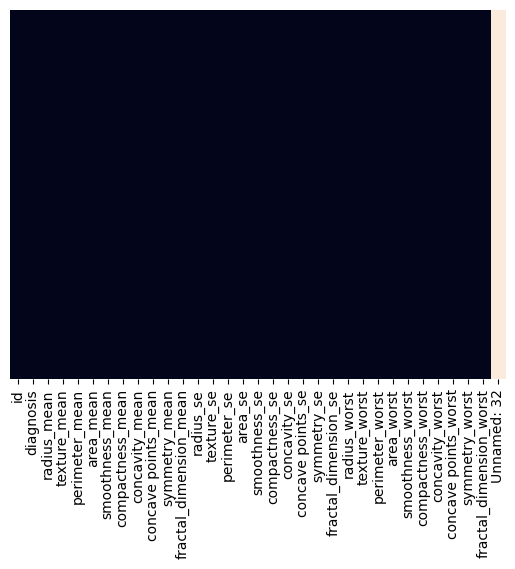

In [7]:
# visualize NAs in heatmap
sns.heatmap(df.isnull(), yticklabels=False, cbar=False)

In [8]:
# drop id and empty column
df.drop(['Unnamed: 32', "id"], axis=1, inplace=True)

In [9]:
# turn target variable into 1s and 0s
df.diagnosis =[1 if value == "M" else 0 for value in df.diagnosis]

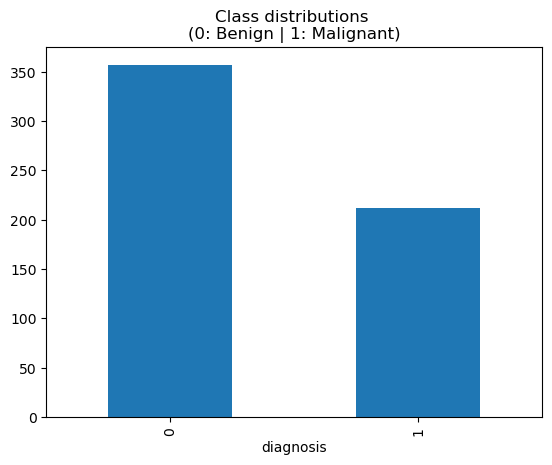

In [10]:
# turn the target variable into categorical data
df['diagnosis'] = df['diagnosis'].astype('category',copy=False)
plot = df['diagnosis'].value_counts().plot(kind='bar', title="Class distributions \n(0: Benign | 1: Malignant)")
fig = plot.get_figure()

In [11]:
# Prepare the model
y = df["diagnosis"] # our target variable
X = df.drop(["diagnosis"], axis=1) # our predictors

In [12]:
# Ideally, we'd scale the data to have all features in comparable ranges; 
# however, we exclude this step as we haven't implemented a method to scale input data during deployment

# Create a scaler object
#scaler = StandardScaler()

# Fit the scaler to the data and transform the data
#X_scaled = scaler.fit_transform(X)

# X_scaled is now a numpy array with normalized data

In [13]:
# X_full_train, X_test, y_full_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_full_train, X_test, y_full_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_full_train, y_full_train, test_size=0.25, random_state=42)

# Exploratory Data Analysis (EDA), feature importance analysis

Note that some EDA has already been performed above; it is divided between the previous and current sections.
We try out 4 classifiers with default parameters before tuning parameters:
    Logistic Regression
    Decision Trees
    Random Forests
    XGBoost
    
Feature importance is analyzed as part of trying out the Random Forests

In [14]:
# Create logistic regression model
lr = LogisticRegression(solver='liblinear')

# Train the model on the training data
lr.fit(X_train, y_train)

# Predict the target variable on the validation data
y_pred = lr.predict(X_val)

# Evaluate the accuracy of the model on validation data
accuracy = accuracy_score(y_val, y_pred)
print(f'LogisticRegression: Accuracy on validation dataset: {accuracy:.2f}')
auc_val = round(roc_auc_score(y_val, y_pred),3)     
print(f"LogisticRegression: AUC on the validation dataset: {auc_val}")

LogisticRegression: Accuracy on validation dataset: 0.96
LogisticRegression: AUC on the validation dataset: 0.963


In [15]:
print("LogisticRegression: Classification Report for validation dataset:")
print(classification_report(y_val,y_pred))

LogisticRegression: Classification Report for validation dataset:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        70
           1       0.95      0.95      0.95        44

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



In [16]:
# Train the model on the training data
lr.fit(X_train, y_train)

# Predict the target variable on the test data
y_pred = lr.predict(X_test)
# Evaluate the accuracy of the model on the test data
accuracy = accuracy_score(y_test, y_pred)
print(f'LogisticRegression: Accuracy on test dataset: {accuracy:.2f}')
auc_test = round(roc_auc_score(y_test, y_pred),3)     
print(f"LogisticRegression: AUC on the test dataset: {auc_test}")

LogisticRegression: Accuracy on test dataset: 0.96
LogisticRegression: AUC on the test dataset: 0.946


In [17]:
print("LogisticRegression: Classification Report for test dataset:")
print(classification_report(y_test,y_pred))

LogisticRegression: Classification Report for test dataset:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        71
           1       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [18]:
# Create decision tree model
dc = DecisionTreeClassifier()

# Train the model on the training data
dc.fit(X_train, y_train)

# Predict the target variable on the validation data
y_pred = dc.predict(X_val)

# Evaluate the accuracy of the model on validation data
accuracy = accuracy_score(y_val, y_pred)
print(f'DecisionTreeClassifier: Accuracy on validation dataset: {accuracy:.2f}')
auc_val = round(roc_auc_score(y_val, y_pred),3)     
print(f"DecisionTreeClassifier: AUC on the validation dataset: {auc_val}")

DecisionTreeClassifier: Accuracy on validation dataset: 0.93
DecisionTreeClassifier: AUC on the validation dataset: 0.934


In [19]:
# Predict the target variable on the test data
y_pred = dc.predict(X_test)

# Evaluate the accuracy of the model on test data
accuracy = accuracy_score(y_test, y_pred)
print(f'DecisionTreeClassifier: Accuracy on test dataset: {accuracy:.2f}')
auc_test = round(roc_auc_score(y_test, y_pred),3)     
print(f"DecisionTreeClassifier:AUC on the test dataset: {auc_test}")

DecisionTreeClassifier: Accuracy on test dataset: 0.95
DecisionTreeClassifier:AUC on the test dataset: 0.944


/Users/optimistix/anaconda3/envs/ml-zoomcamp/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/optimistix/anaconda3/envs/ml-zoomcamp/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/optimistix/anaconda3/envs/ml-zoomcamp/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


RandomForestClassifier: Accuracy on validation dataset: 0.96
RandomForestClassifier: AUC on the validation dataset: 0.956


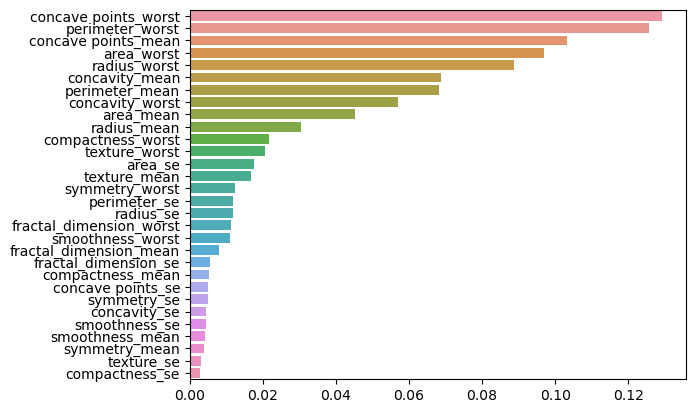

In [20]:
rfc = RandomForestClassifier(class_weight='balanced')
rfc.fit(X_train, y_train)

# plotting the feature importance graph
df_feature_importances = pd.Series(data=rfc.feature_importances_, index=X_train.columns).sort_values(ascending=False)
sns.barplot(x=df_feature_importances, y=df_feature_importances.index);

y_pred = rfc.predict(X_val)
# Evaluate the accuracy of the model on validation data
accuracy = accuracy_score(y_val, y_pred)
print(f'RandomForestClassifier: Accuracy on validation dataset: {accuracy:.2f}')
auc_val = round(roc_auc_score(y_val, y_pred),3)     
print(f"RandomForestClassifier: AUC on the validation dataset: {auc_val}")

In [21]:
y_pred = rfc.predict(X_test)

# Evaluate the accuracy of the model on test data
accuracy = accuracy_score(y_test, y_pred)
print(f'RandomForestClassifier: Accuracy on test dataset: {accuracy:.2f}')
auc_test = round(roc_auc_score(y_test, y_pred),3)     
print(f"RandomForestClassifier:AUC on the test dataset: {auc_test}")

RandomForestClassifier: Accuracy on test dataset: 0.96
RandomForestClassifier:AUC on the test dataset: 0.958


In [22]:
#XGBoost Classifier

xgb_classifier = xgb.XGBClassifier(eval_metric='auc',
              n_estimators=10, random_state=42)
xgb_classifier.fit(X_train, y_train)

y_pred = xgb_classifier.predict(X_val)
# Evaluate the accuracy of the model on validation data
accuracy = accuracy_score(y_val, y_pred)
print(f'XGBoostClassifier: Accuracy on validation dataset: {accuracy:.2f}')
auc_val = round(roc_auc_score(y_val, y_pred),3)     
print(f"XGBoostClassifier: AUC on the validation dataset: {auc_val}")

XGBoostClassifier: Accuracy on validation dataset: 0.96
XGBoostClassifier: AUC on the validation dataset: 0.956


/Users/optimistix/anaconda3/envs/ml-zoomcamp/lib/python3.10/site-packages/xgboost/data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/optimistix/anaconda3/envs/ml-zoomcamp/lib/python3.10/site-packages/xgboost/data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/Users/optimistix/anaconda3/envs/ml-zoomcamp/lib/python3.10/site-packages/xgboost/data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/Users/optimistix/anaconda3/envs/ml-zoomcamp/lib/python3.10/site-packages/xgboost/data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use i

In [23]:
y_pred = xgb_classifier.predict(X_test)
# Evaluate the accuracy of the model on test data
accuracy = accuracy_score(y_test, y_pred)
print(f'XGBoostClassifier: Accuracy on test dataset: {accuracy:.2f}')
auc_val = round(roc_auc_score(y_test, y_pred),3)     
print(f"XGBoostClassifier: AUC on the test dataset: {auc_val}")

XGBoostClassifier: Accuracy on test dataset: 0.96
XGBoostClassifier: AUC on the test dataset: 0.958


/Users/optimistix/anaconda3/envs/ml-zoomcamp/lib/python3.10/site-packages/xgboost/data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/optimistix/anaconda3/envs/ml-zoomcamp/lib/python3.10/site-packages/xgboost/data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/Users/optimistix/anaconda3/envs/ml-zoomcamp/lib/python3.10/site-packages/xgboost/data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/Users/optimistix/anaconda3/envs/ml-zoomcamp/lib/python3.10/site-packages/xgboost/data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use i

In [24]:
print("XGBoost: Classification Report for test dataset:")
print(classification_report(y_test,y_pred))

XGBoost: Classification Report for test dataset:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



# Model selection process and parameter tuning
We saw above that all 4 classifiers produce good results on the validation and test data, indicating that overfitting is unlikely. We shall now tune parameters using GridSearchCV (from scikit-learn) for all classifiers except XGBoost (since that is not a part of scikit-learn), for which parameter tuning shall be done separately.

In [25]:
model_params = {
    'random_forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [1,5,10,15,20,25]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear'),
        'params': {
            'C': [1,5,10,15,20,25]
        }
    },
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini','entropy'],
            
        }
    }     
}

In [26]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False, scoring = 'roc_auc')
    clf.fit(X_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
gridsearch_results = pd.DataFrame(scores,columns=['model','best_score','best_params'])
gridsearch_results

,model,best_score,best_params
0,random_forest,0.994613,{'n_estimators': 20}
1,logistic_regression,0.993319,{'C': 25}
2,decision_tree,0.924850,{'criterion': 'entropy'}


In [27]:
lr_C25 = LogisticRegression(solver='liblinear', C=5)
# Train the model on the training data
lr_C25.fit(X_train, y_train)

# Predict the target variable on the test data
y_pred = lr_C25.predict(X_test)
# Evaluate the accuracy of the model on the test data
accuracy = accuracy_score(y_test, y_pred)
print(f'LogisticRegression, C=25: Accuracy on test dataset: {accuracy:.3f}')
auc_test = round(roc_auc_score(y_test, y_pred),3)     
print(f"LogisticRegression, C=25: AUC on the test dataset: {auc_test}")

LogisticRegression, C=25: Accuracy on test dataset: 0.956
LogisticRegression, C=25: AUC on the test dataset: 0.946


# Parameter tuning for XGBoost


In [28]:
features = list(df.columns[1:31])
regex = re.compile(r"<", re.IGNORECASE)
features = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<',''))) else col for col in features]

dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)
dtest = xgb.DMatrix(X_test, label=y_test, feature_names=features) # Tuning XGBoost parameters
len(features)

/Users/optimistix/anaconda3/envs/ml-zoomcamp/lib/python3.10/site-packages/xgboost/data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/optimistix/anaconda3/envs/ml-zoomcamp/lib/python3.10/site-packages/xgboost/data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/Users/optimistix/anaconda3/envs/ml-zoomcamp/lib/python3.10/site-packages/xgboost/data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/Users/optimistix/anaconda3/envs/ml-zoomcamp/lib/python3.10/site-packages/xgboost/data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use i

30

In [29]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=10)

In [30]:
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

watchlist = [(dtrain, 'train'), (dval, 'val')]

scores = {}

/Users/optimistix/anaconda3/envs/ml-zoomcamp/lib/python3.10/site-packages/xgboost/data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/optimistix/anaconda3/envs/ml-zoomcamp/lib/python3.10/site-packages/xgboost/data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/Users/optimistix/anaconda3/envs/ml-zoomcamp/lib/python3.10/site-packages/xgboost/data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/Users/optimistix/anaconda3/envs/ml-zoomcamp/lib/python3.10/site-packages/xgboost/data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use i

In [31]:
y_pred = model.predict(dval)
round(roc_auc_score(y_val, y_pred),3)

0.979

In [32]:
%%capture output

xgb_params = {
    'eta': 0.01, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [33]:
s = output.stdout

In [34]:
print(s[:200])

[0]	train-auc:0.99757	val-auc:0.95049
[5]	train-auc:0.99765	val-auc:0.95325
[10]	train-auc:0.99817	val-auc:0.95260
[15]	train-auc:0.99843	val-auc:0.95260
[20]	train-auc:0.99843	val-auc:0.95974
[25]	tr


In [35]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    columns = ['num_iter', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [36]:
df_score = parse_xgb_output(output)

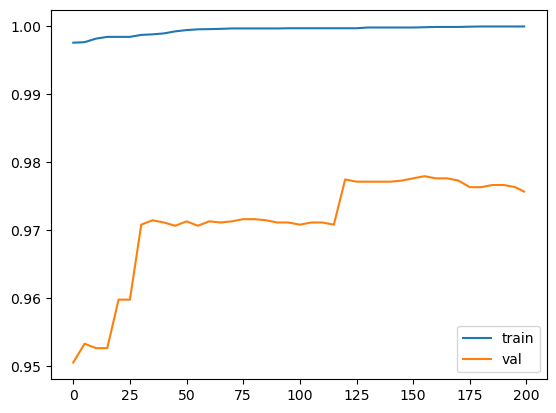

In [37]:
plt.plot(df_score.num_iter, df_score.train_auc, label='train')
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.legend()

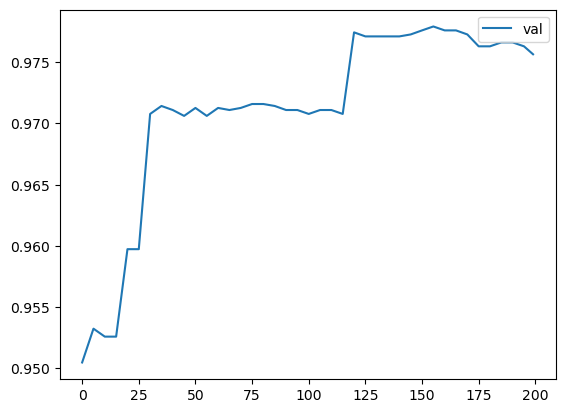

In [38]:
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.legend()

In [39]:
scores = {}

In [40]:
%%capture output

xgb_params = {
    'eta': 0.01, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [41]:
scores = {}

In [42]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key

'eta=0.01'

In [43]:
scores = {}

In [44]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 10,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=125,
                  verbose_eval=5,
                  evals=watchlist)

In [45]:
key = 'max_depth=%s' % (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)
key

'max_depth=10'

In [46]:
# del scores['max_depth=10']

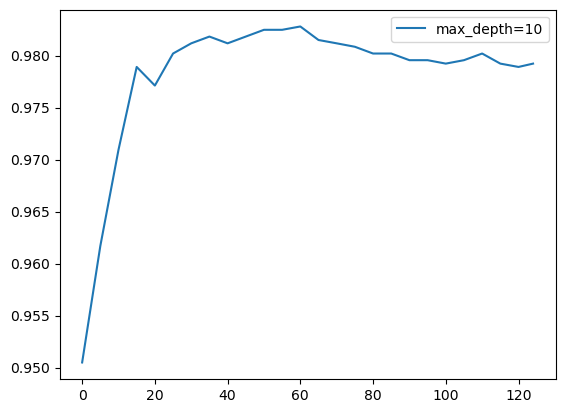

In [47]:
for max_depth, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=max_depth)

plt.legend()

In [48]:
scores = {}

In [49]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 30,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)


In [50]:
key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
scores[key] = parse_xgb_output(output)
key

'min_child_weight=30'

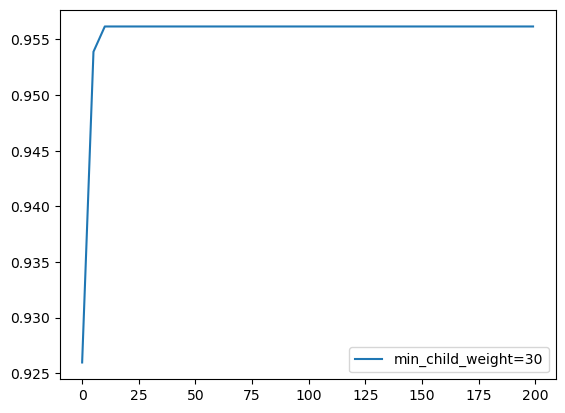

In [51]:
for min_child_weight, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=min_child_weight)

plt.legend()

In [52]:
xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=25)

In [53]:
y_pred = model.predict(dval)
round(roc_auc_score(y_val, y_pred),3)

0.98

In [54]:
y_pred = model.predict(dtest)
round(roc_auc_score(y_test, y_pred),3)

0.996

In [55]:
from xgboost import cv

params = {"objective":"binary:logistic",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

xgb_cv = cv(dtrain=dtrain, params=params, nfold=5,
                    num_boost_round=50, early_stopping_rounds=10, metrics="auc", as_pandas=True, seed=123)

In [56]:
xgb_cv.head()

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.971125,0.004988,0.946760,0.011144
1,0.986057,0.003033,0.966266,0.021630
2,0.989255,0.002457,0.974808,0.016516
3,0.989702,0.002654,0.975878,0.016168
4,0.992617,0.003065,0.979957,0.013285


## Based on the cross-validation AUC values of all models, we choose <b>Logistic Regression with C=25</b> as the final model.

# Model selection after parameter tuning
Having performed parameter tuning for all classifiers, we select Logistic Regression with C=25 as the model with the best cross-validation performance, and save it using Pickle.

In [57]:
model = lr_C25

import pickle
with open('model.bin', 'wb') as f_out:
   pickle.dump(model, f_out)
f_out.close() ## After opening any file it's nessecery to close it

In [58]:
# Check version of scikit to ensure version to ue with pipenv
!conda list scikit

# packages in environment at /Users/optimistix/anaconda3/envs/ml-zoomcamp:
#
# Name                    Version                   Build  Channel
scikit-learn              1.3.0           py310h3ea8b11_0  
